In [25]:
#導入
# numpy: 用於進行數值計算和數組操作。
# pandas: 用於數據處理和數據分析。
# matplotlib: 用於繪製圖表和資料視覺化。
# seaborn: 也是用於資料視覺化和繪製統計圖表的套件。
# sklearn.preprocessing: 用於數據預處理，例如標準化和歸一化等。
# scipy: 用於科學計算和統計分析。
# scipy.stats: 用於機率分布、統計分析等相關的統計計算。
# warnings: 用於控制警告訊息的輸出，通常是用來屏蔽一些不必要的警告訊息，讓程式執行過程更加乾淨。
#%matplotlib inline顯示matplotlib繪製的圖表
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#讀取訓練數據
train = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM\1\A26m2 25度(dry)(複測) CSM.csv")
train1 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM\1\A26m2 50度(dry)(複測) CSM.csv")
train2 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM\1\A26m5 25度(dry)(複測) CSM.csv")
train3 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM\1\A26m5 50度(dry)(複測) CSM.csv")
train4 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM\1\A26m8 25度(dry)(複測) CSM.csv")
train5 = pd.read_csv(r"C:\Users\rex\Desktop\0601\CSM\1\A26m8 50度(dry)(複測) CSM.csv")
print (train)
train.head(5)



                     File       hc(nm)       Pmax(煮)    S(煮/nm)       A(nm^2)  \
0    PA26-2_25蚓_00000.hys    75.582708     33.067175   0.992032  2.186575e+05   
1    PA26-2_25蚓_00000.hys   113.530946     55.360671   1.159187  3.964093e+05   
2    PA26-2_25蚓_00000.hys   155.479352     84.763648   1.397330  6.430877e+05   
3    PA26-2_25蚓_00000.hys   198.169827    121.871218   1.683463  9.540232e+05   
4    PA26-2_25蚓_00000.hys   241.831790    166.475621   1.951806  1.339539e+06   
..                    ...          ...           ...        ...           ...   
195  PA26-2_25蚓_00003.hys  2074.931589   9162.232552  10.891931  9.436158e+07   
196  PA26-2_25蚓_00003.hys  2131.752035   9574.395194  10.985593  9.977502e+07   
197  PA26-2_25蚓_00003.hys  2189.532820   9996.943634  11.063060  1.054388e+08   
198  PA26-2_25蚓_00003.hys  2250.102423  10430.321540  11.139396  1.115481e+08   
199  PA26-2_25蚓_00003.hys  2351.511383  10899.345140  11.160707  1.221713e+08   

        hmax(nm)     heff(n

,File,hc(nm),Pmax(煮),S(煮/nm),A(nm^2),hmax(nm),heff(nm),Er(GPa),H(GPa),A,hf(nm),m,X(mm),Y(mm),Drift(nm/s)
0,PA26-2_25蚓_00000.hys,75.582708,33.067175,0.992032,2.186575e+05,4119.396744,100.582292,1.879655,0.151228,0.014262,38.113730,1.874088,-135.032401,-106.024204,2.383883
1,PA26-2_25蚓_00000.hys,113.530946,55.360671,1.159187,3.964093e+05,4119.396744,149.349590,1.631234,0.139655,0.014737,61.513088,1.839192,-135.032401,-106.024204,2.383883
2,PA26-2_25蚓_00000.hys,155.479352,84.763648,1.397330,6.430877e+05,4119.396744,200.975206,1.543828,0.131807,0.012694,87.971854,1.862862,-135.032401,-106.024204,2.383883
3,PA26-2_25蚓_00000.hys,198.169827,121.871218,1.683463,9.540232e+05,4119.396744,252.464699,1.527070,0.127745,0.013019,117.502697,1.864292,-135.032401,-106.024204,2.383883
4,PA26-2_25蚓_00000.hys,241.831790,166.475621,1.951806,1.339539e+06,4119.396744,305.801622,1.494149,0.124278,0.010318,143.441892,1.903550,-135.032401,-106.024204,2.383883


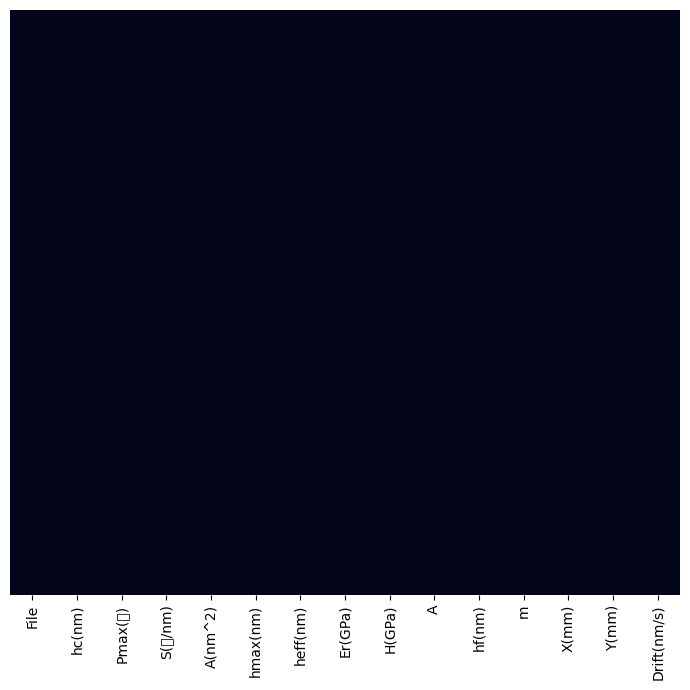

In [26]:
#isnull()看數據缺失值
# yticklabels=False 和 cbar=False 表示去掉熱力圖的 y 軸標籤和顏色條
plt.figure(figsize=(7,7)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [27]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(200, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   File         200 non-null    object 
 1   hc(nm)       200 non-null    float64
 2   Pmax(煮)      200 non-null    float64
 3   S(煮/nm)      200 non-null    float64
 4   A(nm^2)      200 non-null    float64
 5   hmax(nm)     200 non-null    float64
 6   heff(nm)     200 non-null    float64
 7   Er(GPa)      200 non-null    float64
 8   H(GPa)       200 non-null    float64
 9   A            200 non-null    float64
 10  hf(nm)       200 non-null    float64
 11  m            200 non-null    float64
 12  X(mm)        200 non-null    float64
 13  Y(mm)        200 non-null    float64
 14  Drift(nm/s)  200 non-null    float64
dtypes: float64(14), object(1)
memory usage: 23.6+ KB


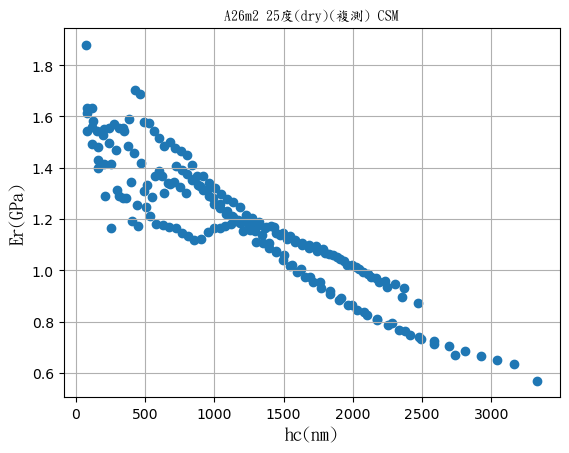

In [28]:
# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train['hc(nm)'], y=train['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m2 25度(dry)(複測) CSM', fontsize=15, fontproperties=font)

plt.show()


In [29]:

train1 = train1.drop(train1[(train1['hc(nm)']>2000) & (train1['Er(GPa)']>17)].index)

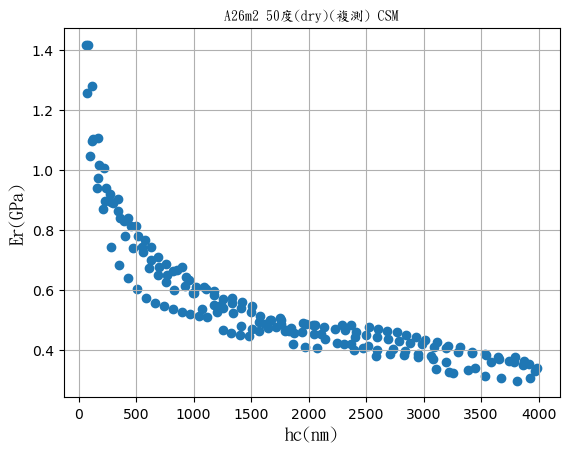

In [30]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train1['hc(nm)'], y=train1['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m2 50度(dry)(複測) CSM', fontsize=15, fontproperties=font)

plt.show()


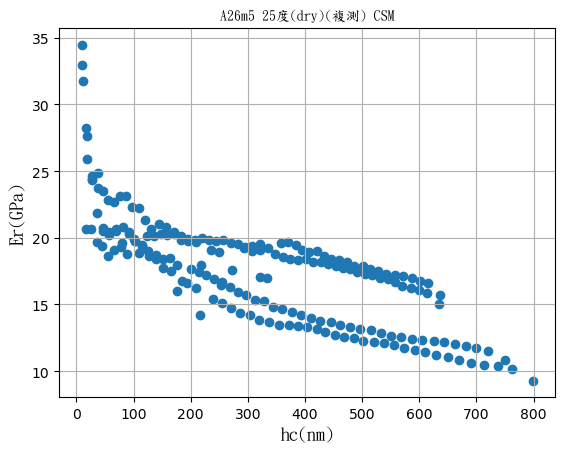

In [31]:
# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train2['hc(nm)'], y=train2['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m5 25度(dry)(複測) CSM', fontsize=15, fontproperties=font)

plt.show()


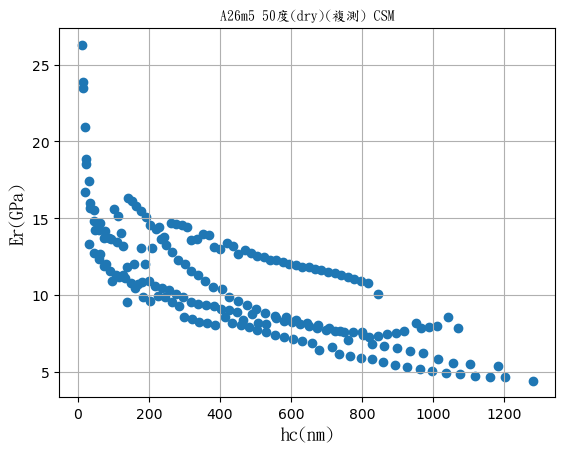

In [32]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train3['hc(nm)'], y=train3['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m5 50度(dry)(複測) CSM', fontsize=15, fontproperties=font)

plt.show()


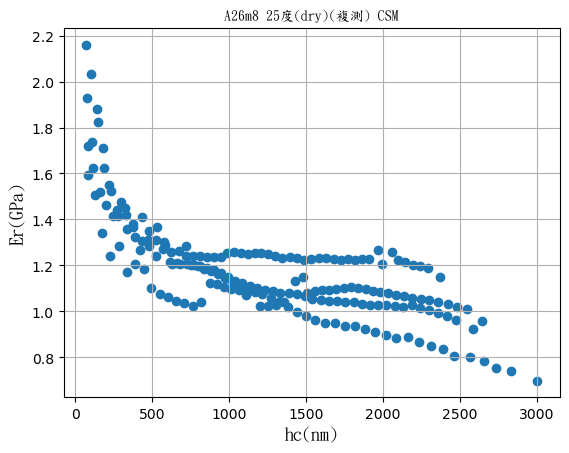

In [37]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train4['hc(nm)'], y=train4['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m8 25度(dry)(複測) CSM', fontsize=15, fontproperties=font)


# # 設置 X 軸範圍到 0 到 6000
# ax.set_xlim(0, 6000)

# # 設置 Y 軸範圍到 0 到 35
# ax.set_ylim(0, 35)

plt.show()


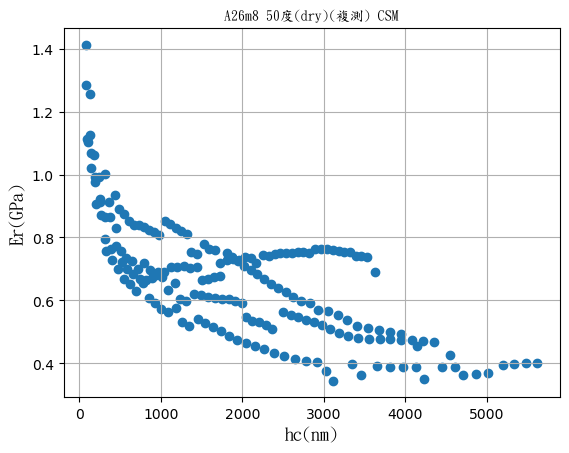

In [34]:

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, ax = plt.subplots()

# 繪製散點圖
ax.scatter(x=train5['hc(nm)'], y=train5['Er(GPa)'])

# 添加網格線
ax.grid(True)

# 設置標籤和標題
ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
ax.set_title('A26m8 50度(dry)(複測) CSM', fontsize=15, fontproperties=font)

plt.show()


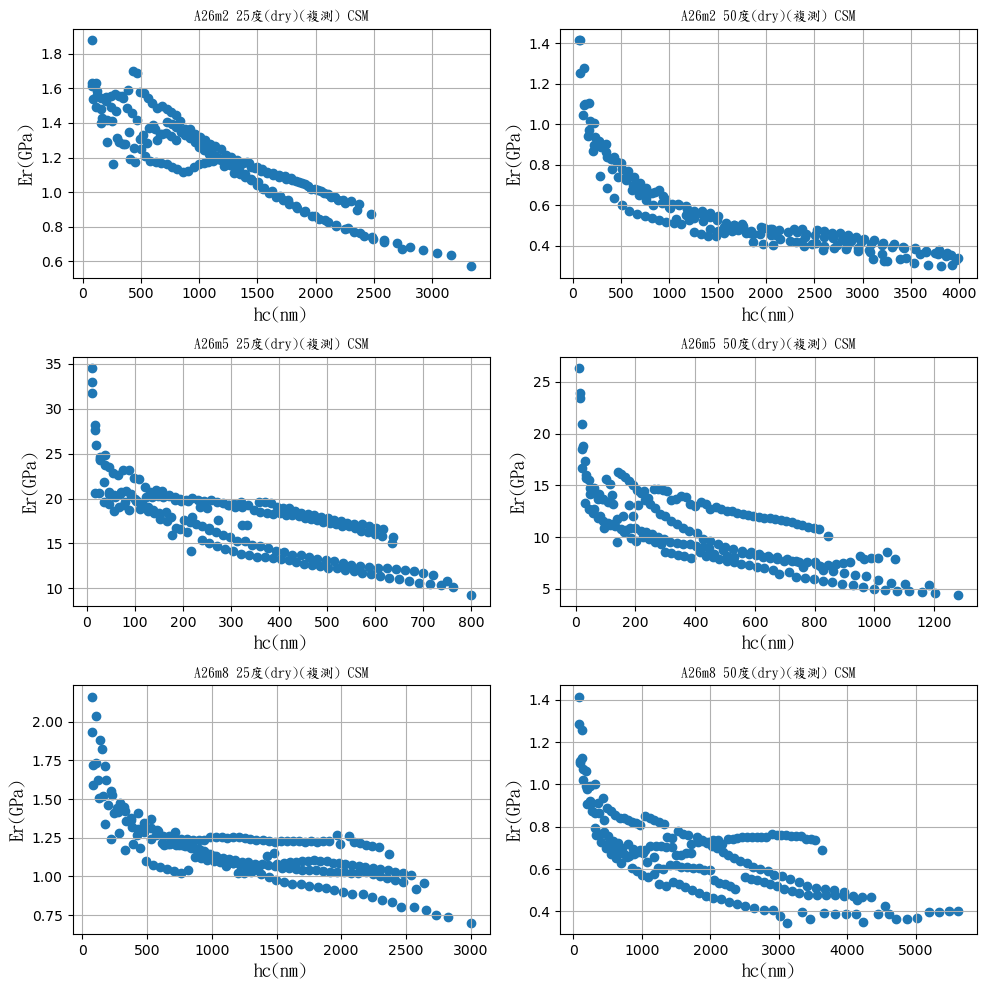

In [38]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 設置中文字型
font = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')

# 創建圖形和子圖
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# 數據列表
datasets = [train, train1, train2, train3, train4, train5]
titles = ['A26m2 25度(dry)(複測) CSM', 'A26m2 50度(dry)(複測) CSM', 'A26m5 25度(dry)(複測) CSM', 'A26m5 50度(dry)(複測) CSM', 'A26m8 25度(dry)(複測) CSM', 'A26m8 50度(dry)(複測) CSM']

# 繪製疊圖
for i, ax in enumerate(axs.flat):
    ax.scatter(x=datasets[i]['hc(nm)'], y=datasets[i]['Er(GPa)'])
    ax.grid(True)
    ax.set_ylabel('Er(GPa)', fontsize=13, fontproperties=font)
    ax.set_xlabel('hc(nm)', fontsize=13, fontproperties=font)
    ax.set_title(titles[i], fontsize=15, fontproperties=font)

# 調整子圖之間的間距
plt.tight_layout()

# 顯示圖形
plt.show()



mu = 1217.69 and sigma = 745.90



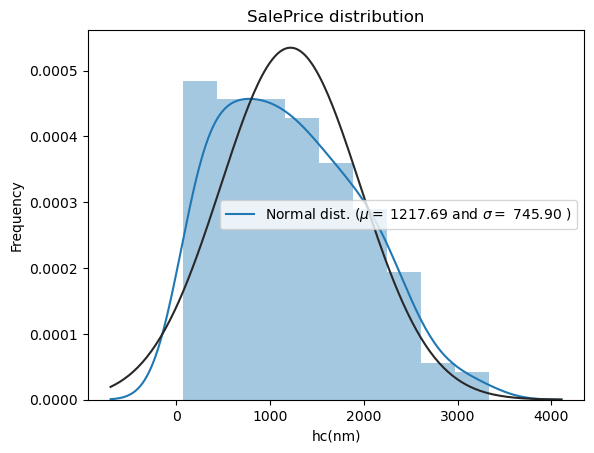

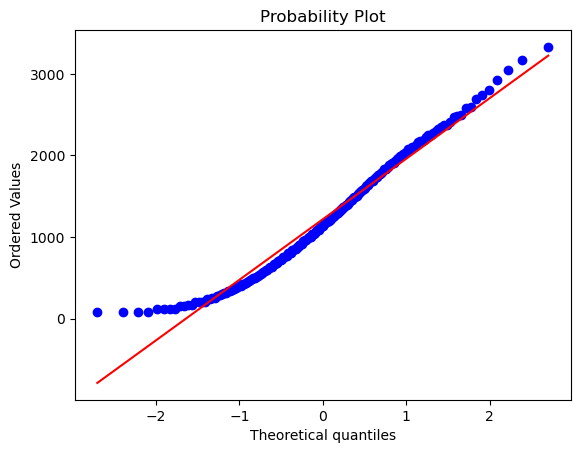

In [35]:
#分析目標變量'SalePrice'的分布，計算均值與標準差
sns.distplot(train['hc(nm)'] , fit=norm);  #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)

(mu, sigma) = norm.fit(train['hc(nm)'])  #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:態分布的標準差。
print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],  #plt.legend用於給圖標添加圖例，
            loc='best')  #loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()   #創建一個新的圖形窗口
res = stats.probplot(train['hc(nm)'], plot=plt)  #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
plt.show()